In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import random
import pylab as pl
from sklearn.metrics import confusion_matrix,accuracy_score
from pathlib import Path

In [2]:
images_paths = []
names = []
y = []
female_subj = 0
male_subj = 0


for root, dirs, files in os.walk("./faces94"):
    for file in files:
        if file.endswith(".jpg"):
            if "female" in root:
                female_subj += 1
                y.append(0)
                names.append(
                    Path(os.path.join(root, file)).parent.name
                )
                images_paths.append(os.path.join(root, file))
            elif "male" in root:
                male_subj += 1
                y.append(1)
                names.append(
                    Path(os.path.join(root, file)).parent.name
                )
                images_paths.append(os.path.join(root, file))

In [3]:
name_sex = list(zip(names, y))

In [4]:
images_paths

['./faces94/malestaff/tony/tony.17.jpg',
 './faces94/malestaff/tony/tony.7.jpg',
 './faces94/malestaff/tony/tony.6.jpg',
 './faces94/malestaff/tony/tony.16.jpg',
 './faces94/malestaff/tony/tony.14.jpg',
 './faces94/malestaff/tony/tony.4.jpg',
 './faces94/malestaff/tony/tony.5.jpg',
 './faces94/malestaff/tony/tony.15.jpg',
 './faces94/malestaff/tony/tony.11.jpg',
 './faces94/malestaff/tony/tony.1.jpg',
 './faces94/malestaff/tony/tony.10.jpg',
 './faces94/malestaff/tony/tony.12.jpg',
 './faces94/malestaff/tony/tony.2.jpg',
 './faces94/malestaff/tony/tony.3.jpg',
 './faces94/malestaff/tony/tony.13.jpg',
 './faces94/malestaff/tony/tony.20.jpg',
 './faces94/malestaff/tony/tony.18.jpg',
 './faces94/malestaff/tony/tony.8.jpg',
 './faces94/malestaff/tony/tony.9.jpg',
 './faces94/malestaff/tony/tony.19.jpg',
 './faces94/malestaff/anonym/anonym.20.jpg',
 './faces94/malestaff/anonym/anonym.8.jpg',
 './faces94/malestaff/anonym/anonym.19.jpg',
 './faces94/malestaff/anonym/anonym.18.jpg',
 './faces9

In [5]:
D = list(zip(images_paths,y))

In [6]:
D

[('./faces94/malestaff/tony/tony.17.jpg', 1),
 ('./faces94/malestaff/tony/tony.7.jpg', 1),
 ('./faces94/malestaff/tony/tony.6.jpg', 1),
 ('./faces94/malestaff/tony/tony.16.jpg', 1),
 ('./faces94/malestaff/tony/tony.14.jpg', 1),
 ('./faces94/malestaff/tony/tony.4.jpg', 1),
 ('./faces94/malestaff/tony/tony.5.jpg', 1),
 ('./faces94/malestaff/tony/tony.15.jpg', 1),
 ('./faces94/malestaff/tony/tony.11.jpg', 1),
 ('./faces94/malestaff/tony/tony.1.jpg', 1),
 ('./faces94/malestaff/tony/tony.10.jpg', 1),
 ('./faces94/malestaff/tony/tony.12.jpg', 1),
 ('./faces94/malestaff/tony/tony.2.jpg', 1),
 ('./faces94/malestaff/tony/tony.3.jpg', 1),
 ('./faces94/malestaff/tony/tony.13.jpg', 1),
 ('./faces94/malestaff/tony/tony.20.jpg', 1),
 ('./faces94/malestaff/tony/tony.18.jpg', 1),
 ('./faces94/malestaff/tony/tony.8.jpg', 1),
 ('./faces94/malestaff/tony/tony.9.jpg', 1),
 ('./faces94/malestaff/tony/tony.19.jpg', 1),
 ('./faces94/malestaff/anonym/anonym.20.jpg', 1),
 ('./faces94/malestaff/anonym/anonym.8.

In [7]:
dataset = D
random.shuffle(dataset)
train = dataset[:int(len(D)/2)]
test = dataset[int(len(D)/2):]

In [8]:
train

[('./faces94/male/npmitc/npmitc.8.jpg', 1),
 ('./faces94/female/sbains/sbains.15.jpg', 0),
 ('./faces94/malestaff/lyond/lyond.2.jpg', 1),
 ('./faces94/male/ggrego/ggrego.5.jpg', 1),
 ('./faces94/female/astefa/astefa.7.jpg', 0),
 ('./faces94/male/djmart/djmart.5.jpg', 1),
 ('./faces94/female/slbirc/slbirc.18.jpg', 0),
 ('./faces94/malestaff/fordj/fordj.3.jpg', 1),
 ('./faces94/male/nhrams/nhrams.11.jpg', 1),
 ('./faces94/male/cjsake/cjsake.8.jpg', 1),
 ('./faces94/male/khchan/khchan.16.jpg', 1),
 ('./faces94/male/miaduc/miaduc.2.jpg', 1),
 ('./faces94/male/akatsi/akatsi.13.jpg', 1),
 ('./faces94/male/mhwill/mhwill.17.jpg', 1),
 ('./faces94/male/dakram/dakram.3.jpg', 1),
 ('./faces94/male/maasht/maasht.19.jpg', 1),
 ('./faces94/male/djmart/djmart.3.jpg', 1),
 ('./faces94/male/maasht/maasht.10.jpg', 1),
 ('./faces94/male/jrtobi/jrtobi.15.jpg', 1),
 ('./faces94/male/jrtobi/jrtobi.5.jpg', 1),
 ('./faces94/female/phughe/phughe.17.jpg', 0),
 ('./faces94/female/9338535/9338535.12.jpg', 0),
 ('

In [9]:
image_paths, y_train = zip(*train)
image_paths_test, y_test = zip(*test)

## Feature extraction

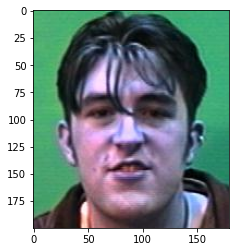

In [21]:
des_list=[]
orb=cv2.ORB_create()
im=cv2.imread(image_paths[1])
plt.imshow(im)

In [22]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    for kp in keypoints:
            x, y = kp.pt
            plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

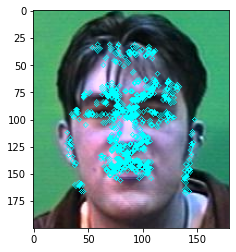

In [24]:
#detect the "words"

kp = orb.detect(im,None)
kp, des = orb.compute(im, kp)
img=draw_keypoints(im,kp)

In [25]:
for image_pat in image_paths:
    im=cv2.imread(image_pat)
    kp=orb.detect(im,None)
    keypoints,descriptor= orb.compute(im, kp)
    des_list.append((image_pat,descriptor))

In [26]:
descriptors=des_list[0][1]
for image_path,descriptor in des_list[1:]:
    descriptors=np.vstack((descriptors,descriptor))

In [27]:
descriptors.shape

(400593, 32)

In [28]:
descriptors_float=descriptors.astype(float)

## K means clustering

In [85]:
descriptors_float

array([[ 93.,  52., 189., ...,  97., 135.,  51.],
       [ 72.,  48., 189., ..., 160.,   6.,  99.],
       [163., 233., 104., ..., 156., 218., 206.],
       ...,
       [238.,  50., 149., ..., 116., 135.,  27.],
       [221.,  65.,  23., ..., 183.,  42.,  36.],
       [116., 174., 149., ..., 105., 198., 171.]])

In [29]:
from scipy.cluster.vq import kmeans,vq
k=200
#voc is the vector of centroids, the vector that contains the coordinates of the K cluster centers
voc,variance=kmeans(descriptors_float,k,1)

The kmeans method clusters descriptors_float, which is a matrix that represents the entire dataset of images, into k "areas", where K equals 200 in this case.
The kmeans method returns a tuple: voc, which is the array that contains the 200 "centroids" of the clustered 32 dimensional space, and variance (not used in this analysis)

In [54]:
voc.shape

(200, 32)

I have clustered the space into 200 areas. The space has 32 features

In [62]:
words,distance=vq(des_list[110][1],voc)
words

array([191, 184,  99, 134,  53, 174, 122, 168,  75, 120, 147, 122, 126,
        97, 129,  33, 120,  16, 145, 123, 123, 106, 166, 134,  67,  79,
       154, 121, 136,  95, 158, 140,  30,  39, 166,  79, 142, 187,  88,
        69,  60,  61, 174, 115, 195, 190,  27,  47, 195,  27,  59,  81,
        37,  71,  37,  56, 136,  39, 115,  22,  62, 145, 175,   5, 110,
        91,  18, 171, 125,  53,  18,  18, 149,  19, 195, 197, 133,  59,
       163, 138, 194,  62,  33,  34,  53, 196,  61,  96, 131, 106,  19,
        54, 149, 134,  48,  79,  10, 192, 182,   2, 129, 142,  27,  27,
        25,  54, 110, 143,   0, 120,  69, 166,   9,  99,   9, 132,  97,
        89, 174,  89, 166, 152,  54, 185,  59, 109,  13,  11,  27,  27,
       148,  29,  37,  37,  44,  23, 164,  28,  62, 137,  62, 175, 149,
        86, 191, 124, 110,  86, 119,  79, 110,  59, 120,  11, 183,  33,
        33,  47,  56, 106, 102,  93, 123,  54, 134,  25,  14,  79, 192,
        10,  48,  62, 125,  91,  91, 145,  76,   1,  10,   1, 19

In [66]:
im_features=np.zeros((len(image_paths),k),"float32")
# Use the codebook to assign each observation to a cluster via vector quantization

for i in range(len(image_paths)):
    # Use the codebook to assign each observation to a cluster via vector quantization
    #labels, distance = vq(dataset, codebook)
    words,distance=vq(des_list[i][1],voc)
    for w in words:
        im_features[i][w]+=1
        #im_features is a NxM matrix: N is the total number of images, 1529, M is the total number of features, 200, the 200 words

The vq method clusters the images based on the

In [75]:
voc

array([[158.98269533, 120.77294179, 179.46722601, ...,  91.82852648,
         74.14001049,  93.92396434],
       [127.7661442 , 117.40438871, 180.41567398, ..., 133.01191223,
         92.83260188, 126.52978056],
       [ 87.04536188, 202.54026504,  90.5667686 , ...,  67.47349643,
        183.50407747, 194.45107034],
       ...,
       [ 34.16086779, 183.29635694, 153.10274253, ..., 144.57511257,
        182.76831764, 224.24150634],
       [126.34632035, 182.11904762, 168.25      , ...,  92.50865801,
        129.57683983,  87.4469697 ],
       [135.86211573, 117.79159132, 206.84086799, ..., 209.48553345,
         78.2744123 , 102.38426763]])

In [74]:
i = 200
des_list[i][1]

array([[135,   2, 243, ..., 247,  33, 245],
       [176, 233,  19, ...,  25, 246, 170],
       [ 40, 234,  92, ..., 136,  78, 138],
       ...,
       [129, 166,  64, ...,   0, 139, 140],
       [  1, 141, 154, ..., 192, 193,  44],
       [ 57, 135, 233, ..., 224, 210, 112]], dtype=uint8)

In [70]:
i = 200
words,distance=vq(des_list[i][1],voc)
words

array([  4, 158, 158,  66,  66,  66,  93, 165, 122,  66,  84, 182, 141,
       141,  66, 185,  73,  42,  32,  42, 198, 153, 143,  34,  55, 159,
       187, 192,  83, 103,  24,  63, 187,  59, 198, 101,  55,   2, 126,
       156,  89,  55,   7,   8,  27,  24, 192,  25,  68,  87,  99,  44,
        13,  34, 110, 167, 192, 131,  23, 137,  88,   4,  98, 198,  45,
       134,  13, 169,  42, 145,  34,  28,   1, 124, 160, 123,  25,  71,
        92,  89, 156,  34,  39, 185,  24,   8, 135, 162,   7,  89,  24,
       192,  73,  45,  24, 185, 120,  24,  23,  39, 134, 121,  48, 102,
        77, 131, 139, 178,  32, 166, 193, 154,   4,  22, 121,   0,   4,
        18, 158,  35,  52,  69,  13,  90,  30,  40, 100,  64,  36,  29,
       123, 148,  32,  70,  59,  40, 103, 101,  70, 101,  74, 167,  24,
       135,  43, 134, 194, 186,  77,  63,  63,  40, 177,  25,  40, 126,
        20,   9,  88, 188,  98, 155, 145,  45,  60,  86,  35,  97, 139,
        11,  12, 167,  15,  20, 112, 135,  34, 100,   8,  82,  2

In [67]:
im_features

array([[2., 0., 0., ..., 0., 0., 1.],
       [3., 1., 2., ..., 4., 3., 1.],
       [1., 4., 3., ..., 6., 3., 1.],
       ...,
       [0., 0., 3., ..., 0., 0., 2.],
       [4., 0., 1., ..., 4., 3., 0.],
       [0., 0., 3., ..., 4., 3., 0.]], dtype=float32)

####Classification model with Support Vector Machines

In [31]:
from sklearn.preprocessing import StandardScaler
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)

In [32]:
from sklearn.svm import LinearSVC
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

LinearSVC(max_iter=80000)

In [33]:
LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=80000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

LinearSVC(max_iter=80000)

## Testing the model

In [45]:
des_list_test=[]

In [36]:
for image_pat in image_paths_test:
    image=cv2.imread(image_pat)
    kp=orb.detect(image,None)
    keypoints_test,descriptor_test= orb.compute(image, kp)
    des_list_test.append((image_pat,descriptor_test))

In [37]:
len(image_paths_test)

1530

In [38]:
from scipy.cluster.vq import vq
test_features=np.zeros((len(image_paths_test),k),"float32")
for i in range(len(image_paths_test)):
    words,distance=vq(des_list_test[i][1],voc)
    for w in words:
        test_features[i][w]+=1

In [39]:
test_features

array([[0., 0., 1., ..., 0., 1., 7.],
       [2., 7., 3., ..., 4., 4., 4.],
       [0., 1., 4., ..., 4., 0., 0.],
       ...,
       [5., 0., 0., ..., 1., 4., 3.],
       [0., 0., 1., ..., 2., 0., 1.],
       [2., 1., 2., ..., 5., 2., 1.]], dtype=float32)

In [40]:
test_features=stdslr.transform(test_features)

In [41]:
true_classes=[]
for i in y_test:
    if i==1:
        true_classes.append("male")
    else:
        true_classes.append("female")

In [42]:
predict_classes=[]
for i in clf.predict(test_features):
    if i==1:
        predict_classes.append("male")
    else:
        predict_classes.append("female")

In [43]:
clf.predict(test_features)

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
accuracy=accuracy_score(true_classes,predict_classes)
print(accuracy)

0.9143790849673202


In [47]:
code_book = np.array([[1.,1.,1.],
                   [2.,2.,2.]])

In [48]:
features  = np.array([[  1.9,2.3,1.7],
                   [  1.5,2.5,2.2],
                   [  0.8,0.6,1.7]])

In [49]:
vq(features,code_book)

(array([1, 1, 0], dtype=int32), array([0.43588989, 0.73484692, 0.83066239]))